In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('iris.data.csv')

In [13]:
# Showcase the end of the DataFrame to validate data integrity
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
import numpy as np

In [15]:
# See perceptron_model_iris_set.ipynb for reference. As these are the same variables in question for this jupyter notebook
y = df.iloc[:99, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[:99, [0, 2]].values

In [16]:
import matplotlib.pyplot as plt

In [17]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%autoreload 2

In [19]:
import adaline_linear_neuron_classifier

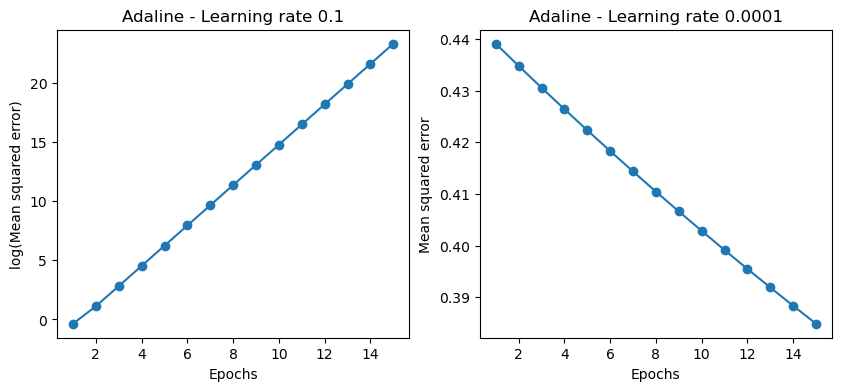

In [20]:
# Plot the loss against the number of epochs for the two different learning rates
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = adaline_linear_neuron_classifier.AdalineGD(n_iter=15, eta=0.1).fit(X,y)
ax[0].plot(range(1, len(ada1.losses_) + 1),
           np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = adaline_linear_neuron_classifier.AdalineGD(n_iter=15, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.losses_) + 1),
           ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [ ]:
# As we can see in the resulting loss function plots, we encountered two different types of problems. The
# left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing
# the loss function, the MSE becomes larger in every epoch, because we overshoot the global minimum.
# On the other hand, we can see that the loss decreases on the right plot, but the chosen learning rate,
# 𝜂 = 0.0001 , is so small that the algorithm would require a very large number of epochs to converge
# to the global loss minimum